# Simon Benninga's Financial Modeling, 4th edition
## Part II: Portfolio Models
### Chapter 11: Estimating Betas and the Security Market Line

In [1]:
import numpy as np
import pandas as pd


Bad key "echo backend" on line 1 in
/Users/danieltoma/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
prices = pd.read_csv('pages_277.csv')

In [3]:
prices.head()

,Date,S&P 500 Index ^GSPC,Alcoa AA,American International Group AIG,American Express AXP,Boeing BA,Citigroup C,Caterpillar CAT,DuPont DD,Disney DIS,...,Altria MO,Merck MRK,Microsoft MSFT,Pfizer PFE,Proctor Gamble PG,AT&T T,United Technologies UTX,Verizon VZ,Walmart WMT,Exxon Mobil XOM
0,01-07-03,1211.23,35.37,81.32,33.73,53.64,40.97,24.73,36.29,25.02,...,35.61,53.98,28.78,36.99,32.14,35.55,33.96,43.92,53.51,37.11
1,01-08-01,1133.58,34.50,76.43,30.46,47.06,37.49,22.45,35.01,24.14,...,37.10,51.96,24.81,34.47,33.55,32.30,31.75,40.55,45.99,35.88
2,01-09-04,1040.94,28.06,76.24,24.30,30.79,33.15,20.11,32.07,17.68,...,37.79,53.16,22.25,36.08,32.94,37.20,21.58,43.89,47.45,35.21
3,01-10-01,1059.78,29.34,76.82,24.68,29.97,37.26,20.23,34.18,17.65,...,36.63,50.93,25.29,37.70,33.57,30.26,25.01,40.68,49.28,35.25
4,01-11-01,1139.45,35.09,80.54,27.60,32.43,39.34,21.45,38.21,19.43,...,36.92,54.07,27.92,39.07,35.24,29.68,28.05,38.39,52.87,33.62


In [4]:
#transform these price data to returns

In [5]:
monthly_returns = pd.DataFrame(data=None, columns=prices.columns, dtype=float)
for row in range(0, len(prices)):
    monthly_returns = monthly_returns.append({'Date':prices.iloc[row][0]}, ignore_index=True)
    for col in range(1, prices.columns.size):
        monthly_returns.iloc[:,col] = np.log(prices.iloc[:,col]/prices.iloc[:,col].shift(1))

In [6]:
monthly_returns.head()

,Date,S&P 500 Index ^GSPC,Alcoa AA,American International Group AIG,American Express AXP,Boeing BA,Citigroup C,Caterpillar CAT,DuPont DD,Disney DIS,...,Altria MO,Merck MRK,Microsoft MSFT,Pfizer PFE,Proctor Gamble PG,AT&T T,United Technologies UTX,Verizon VZ,Walmart WMT,Exxon Mobil XOM
0,01-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-08-01,-0.066256,-0.024905,-0.062017,-0.101973,-0.130872,-0.088766,-0.096726,-0.035908,-0.035805,...,0.040990,-0.038139,-0.148434,-0.070558,0.042936,-0.095873,-0.067291,-0.079834,-0.151445,-0.033706
2,01-09-04,-0.085257,-0.206614,-0.002489,-0.225938,-0.424233,-0.123032,-0.110073,-0.087713,-0.311436,...,0.018428,0.022832,-0.108905,0.045649,-0.018349,0.141242,-0.386126,0.079151,0.031253,-0.018850
3,01-10-01,0.017937,0.044607,0.007579,0.015517,-0.026993,0.116878,0.005949,0.063720,-0.001698,...,-0.031177,-0.042854,0.128067,0.043921,0.018945,-0.206482,0.147509,-0.075950,0.037842,0.001135
4,01-11-01,0.072484,0.178964,0.047289,0.111823,0.078887,0.054321,0.058558,0.111457,0.096082,...,0.007886,0.059827,0.098934,0.035695,0.048549,-0.019353,0.114713,-0.057940,0.070318,-0.047344


In [7]:
average_return = np.array(monthly_returns.mean())
average_return

array([ 0.00073025, -0.00088045, -0.00535605,  0.00720786,  0.00666011,
        0.00301019,  0.01794454,  0.00184578,  0.00293065, -0.00234459,
       -0.00871159, -0.00517898,  0.00289388,  0.0060646 , -0.00465123,
       -0.00726481,  0.00337417,  0.00184752,  0.00117112,  0.0034537 ,
        0.00637421,  0.01302525, -0.00630845, -0.00352046, -0.00743361,
        0.00940232, -0.00413441,  0.01032562, -0.00491148, -0.00252045,
        0.00877842])

In [8]:
from scipy.stats import linregress

In [9]:
market = np.array(monthly_returns.iloc[1:,[1]].T)[0]

In [10]:
beta=[]
alpha=[]
rsq=[]
for i in range(1, monthly_returns.columns.size):
    beta.append(linregress(market, monthly_returns.iloc[1:,i].T).slope)
    alpha.append(linregress(market, monthly_returns.iloc[1:,i].T).intercept)
    rsq.append(linregress(market, monthly_returns.iloc[1:,i].T).rvalue ** 2)

In [11]:
beta[0:5]

[1.0,
 1.9027983836619951,
 0.9935759742954664,
 1.3784130266948678,
 1.1514634616640855]

In [12]:
alpha[0:5]

[0.0,
 -0.0022699748020782329,
 -0.0060816133981730592,
 0.0062012673597366492,
 0.0058192508894684232]

In [13]:
rsq[0:5]

[1.0,
 0.60847765066893644,
 0.35184811122035275,
 0.70517801760363652,
 0.24867752412854963]

In [14]:
#the second-pass regression

In [15]:
#intercept
intercept = linregress(beta[1:], average_return[1:]).intercept
intercept

0.0036425889567741994

In [16]:
#slope
slope = linregress(beta[1:], average_return[1:]).slope
slope

-0.0019724382524452422

In [17]:
#R-squared
r2 = linregress(beta[1:], average_return[1:]).rvalue ** 2
r2

0.023752424923938437

Our test of the SML has failed. The CAPM may have prescriptive validity, but it does not describe our data.
Reasons: Perhaps the CAPM itself does not hold. Perhaps CAPM holds only for portfolios and not for single assets.
Perhaps our set of assets isn't large enouth. Perhaps the "Market Portfolio isn't efficient. Perhaps the CAPM holds only if the markets returns are positive (in the period surveyed they were, on average, negative)

In [18]:
graph = pd.DataFrame(data=None, index=prices.columns[2:])
graph['Beta'] = beta[1:]
graph['R-squared'] = rsq[1:]
graph.head()

,Beta,R-squared
Alcoa \rAA,1.902798,0.608478
American International Group \rAIG,0.993576,0.351848
American Express AXP,1.378413,0.705178
Boeing BA,1.151463,0.248678
Citigroup C,1.295165,0.597184


In [19]:
%matplotlib inline

In [20]:
import matplotlib.pyplot as plt

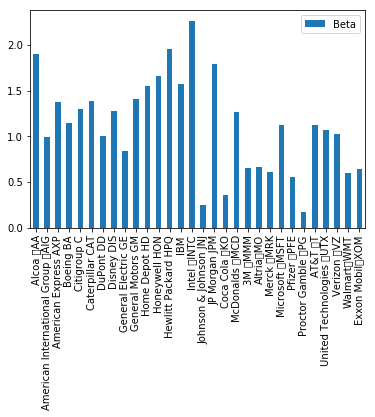

In [21]:
graph[0:].plot(x=graph.index, y='Beta', kind='bar')

In [22]:
#Average alpha
np.mean(alpha[1:])

0.00061966988468731353

In [23]:
#Average beta
np.mean(beta[1:])

1.118485177149374

In [24]:
#Average r-squared
np.mean(rsq[1:])

0.35095346425124202

In [25]:
df = monthly_returns.iloc[1:,2:]
n=len(df.columns)

In [26]:
matrix = pd.DataFrame(columns=df.columns[0:], index=df.columns[0:], dtype=float)
for i in range(0, n):
    for j in range(0, n):
        if i == j:
            matrix.iloc[i, j] = np.cov(df.iloc[:,i],df.iloc[:,j])[0][0]
        else:
            matrix.iloc[i, j] = np.cov(df.iloc[:,i],df.iloc[:,j])[0][1]

In [27]:
matrix.iloc[0:5,0:5]

,Alcoa AA,American International Group AIG,American Express AXP,Boeing BA,Citigroup C
Alcoa \rAA,0.009281,0.003200,0.003760,0.004504,0.003344
American International Group \rAIG,0.003200,0.004376,0.002021,0.000982,0.002289
American Express AXP,0.003760,0.002021,0.004202,0.003013,0.003084
Boeing BA,0.004504,0.000982,0.003013,0.008316,0.001434
Citigroup C,0.003344,0.002289,0.003084,0.001434,0.004381


In [28]:
w = np.divide(np.dot(np.linalg.inv(matrix), (average_return[1:].T - 0.003)),
              np.sum(np.dot(np.linalg.inv(matrix), (average_return[1:].T - 0.003))))
w

array([ 0.054533  , -0.11770778, -0.05777415, -0.13940218, -0.36597846,
        0.76258386, -0.22553923, -0.17046386, -0.08799002, -0.37734605,
       -0.37209624, -0.17396667,  0.39790129, -0.26380245, -0.18624147,
        0.65075625,  0.53610176, -0.12953198, -0.12181615, -0.02066303,
        0.42146   ,  0.08293597,  0.03612117, -0.61185819,  0.54673295,
       -0.08376953,  0.44052369, -0.36551   ,  0.64783317,  0.29397433])

In [29]:
sum(w)

1.0

In [30]:
#largest short position
min(w) 

-0.6118581918127457

In [31]:
#largest long position
max(w)

0.76258386330203298

In [32]:
#Using Excess Returns
risk_free = pd.read_csv('pages_287_Tbill.csv', index_col=0)

In [33]:
risk_free.head()

,T-bill
Date,
01-Aug-01,0.002925
04-Sep-01,0.002800
01-Oct-01,0.002200
01-Nov-01,0.001800
03-Dec-01,0.001558


In [34]:
returns = monthly_returns.iloc[1:,1:]
excess = pd.DataFrame(columns=returns.columns, index=returns.index, dtype=float)
f = np.array(risk_free)
for i in range(0, len(returns)):
    for j in range(0, len(returns.columns)):
        excess.iloc[i, j] = returns.iloc[i, j] - f[0][0] #the book uses the first only "0.002925"

In [35]:
excess_average = excess.mean()

In [36]:
excess_beta=[]
excess_alpha=[]
excess_rsq=[]
excess_market = excess.iloc[0:,0].T
for i in range(0, 31):
    excess_beta.append(linregress(excess_market, returns.iloc[0:,i].T).slope)
    excess_alpha.append(linregress(excess_market, returns.iloc[0:,i].T).intercept)
    excess_rsq.append(linregress(excess_market, returns.iloc[0:,i].T).rvalue ** 2)

In [38]:
#Average beta
np.mean(excess_beta[1:])

1.118485177149374

In [39]:
#Average r-squared
np.mean(excess_rsq[1:])

0.35095346425124191